<a href="https://colab.research.google.com/github/br4bit/Neural-Network-Training/blob/master/Guide_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning (Apprendimento Rinforzato)

Il *Reinforcement Learning (RL)* è uno dei campi più eccitanti del Machine Learning oggi, e anche uno dei più vecchi, esiste dagli anni '50.

## Imparare ad ottimizzare i rewards.

Nel Reinforcement Learning, un software *agent* effettua delle *osservazioni* e intraprende delle *azioni* all'interno di un *ambiente (environment)*  e in cambio riceve dei *rewards*.

Il suo obiettivo è imparare ad agire in modo da massimizzare i suoi *rewards* a lungo termine. E' possibile pensare a *rewards* positivi come un piacere, e *rewards* negativi come un dolore/pena. In breve, l'agente agisce nell'ambiente e impara per tentativi ed errori a massimizzare il suo piacere e a minimizzare la sua pena.

Vediamo alcuni esempi di applicazione:

1 (a). L'agente può essere un programma che controlla il movimento di un robot. In questo caso, l'ambiente è il mondo reale, l'agente osserva l'ambiente attraverso un set di sensori, come camera e sensori touch, e agisce inviando segnali ai motori per attivarli. Può essere programmato per ricevere rewards positivi ogni volta che si avvicina alla destinazione, e reward negativi qualora perdesse tempo, andando nella direzione sbagliata o cade.

2 (b). L'agente può essere un programma che controlla Ms. Pac-Man. In questo caso, l'ambiente è la simulazione del gioco Atari. le azioni da intraprendere sono le 9 possibili posizioni del joystick (sopra,sotto,e così via), le osservazioni da cui osservare per intraprendere le azioni saranno gli screenshots, mentre i rewards i game point.

3 (c). L'agente può essere un semplice programma che gioca ad un gioco da tavolo come *Go*.

4 (d). Non necessariamente l'agente deve controllare dei movimenti virtuali o reali di un qualcosa. Ad esempio, può essere un semplice termostato, che riceve dei rewards ogni volta che è vicino alla suo obiettivo di temperatura e risparmia energia e rewards negativi ogni volta che una mano esterna gli modifichi la temperatura, in questo modo l'agente impara ad anticipare i bisogni umani.

5 (e). L'agente può osservare il prezzo di una merce in magazzino per decidere quando comprare e vendere ogni secondo. I rewards saranno ovviamente i guadagni e le perdite monetarie.

![alt text](https://i.gyazo.com/thumb/1000/8e9980121e73e72575469bc49abaff56-png.jpg)


Da notare che non sempre possono esserci rewards positivi; per sempio, l'agente può muoversi in un labirinto, ricevendo rewards negativi ad ogni istante di tempo, dove è meglio trovare un'uscita il più velocemente possibile. Ci sono un mucchio di task dove il RL è stato applicato come nel self-driving cars, per gli ads di una web page, o per controllare dove l'attenzione è focalizzata in un sistema di classificazione d'immagini.

## Policy Search (Determinazone delle azioni da intraprendere)

Il *Policy Search* può essere visto come una linea di condotta o un metodo per determinare le azioni che l'agente deve intraprendere. In breve, è un algoritmo usato dal software agent per determinare le sue azioni, è chiamato la sua *policy*. Per esempio, la policy potrebbe essere una rete neurale che riceve in input le osservazioni e da come output le azioni da compiere:

![alt text](https://i.gyazo.com/d2553cf9477314cc2d9db6282b49562c.png)


La policy può essere qualsiasi algoritmo a cui si possa pensare, e non deve essere nemmeno deterministico. Ad esempio, consideriamo un'aspirapolvere robotica, la cui ricompensa è la quantità di polvere che raccoglie in 30 minuti. La sua policy potrebbe essere quella di muoversi in avanti con una probabilità *p* ogni secondo, oppure ruotare in modo casuale a destra o a sinistra con una probabilità di *1-p*. L'angolo di rotazione sarà un angolo casuale compreso tra *-r e r*. Dal momento che questa policy introduce un pò di casualità è chiamata *stochastic policy*.
Il robot avrà una traiettoria errata, che garantisce che alla fine raggiungerà qualsiasi posto possa raggiungere e raccoglierà tutta la polvere. La domanda è: Quanta polvere riuscirà a raccogliere in 30 minuti?

Come si può addestrare questo robot? Ci sono solo due *policy parametri* che si possono modificare: la probabilità *p* e l'angolo *r*. Un possibile algoritmo di apprendimento potrebbe essere quello di provare molti valori diversi per questi parametri, e scegliere la combinazione che performa al meglio. Questo è un esempio di *policy search*, in questo caso utilizzando un approccio a forza bruta. Tuttavia quando lo *spazio di policy* è molto ampio, trovare un buon set di parametri in questo modo è come cercare un ago in un pagliaio.

Un'altra strada per esplorare lo *spazio di policy (policy space)*  è di usare un *genetic algorithms (algoritmi genetici)*. Per esempio, si potrebbe creare casualmente una prima generazione di 100 policies (criteri) e provarli, uccidere le 80 peggiori policies, e lasciare le restanti 20 come sopravvisuti che producono 4 figli ciascuno. Un figlio non è altro che una copia del suo genitore più una variazione casuale. Le policies sopravvisuti più la loro prole (figli) insieme costituiranno la seconda generazione. Il processo si itera attraverso tutte le generazioni in questo modo, finchè non si trova la policy perfetta.

![alt text](https://i.gyazo.com/ff957f4cf89c999079ebacbcb494c83c.png)


Un altro approccio può essere quello di una tecnica di ottimizzazione, che valuta i gradienti di ogni reward rispetto ai parametri della policy, quindi aggiustando questi parametri seguendo il gradiente verso i rewards più alti *gradient ascent*. Questo approccio è chiamato *policy gradients (PG)*.
Per esempio, torniamo indietro all'aspirapolvere, si potrebbe aumentare leggermente *p* e valutare se questo aumenta la quantità di polvere raccolta dal robot in 30 minuti; se lo fa, allora incrementa *p* un pò di più, o altrimenti riduci *p*. 

Prima di implementare l'algoritmo di PG usando TensorFlow, c'è bisogno di creare un ambiente per l'agente dove possa vivere. Introduciamo OpenAI gym.

## Introduzione OpenAI gym

Una delle sfide dell'apprendimento rinforzato è che per addestare un agente c'è bisogno di un ambiente di lavoro. Se si vuole programmare un agente che impara a giocare ad un gioco Atari, c'è bisogno di un simulatore di gioco Atari. Se si vuole programmare un robot che cammini, allora l'ambiente è il mondo reale dove si può addestrare direttamente il robot in quel ambiente, ma con delle limitazioni: se il robot cade da una scogliera, non basta solo "annullare" l'azione. Non è possibile accelerare il tempo; aggiungere più potenza computazionale non farà si che il robot si muova più velocemente. E in genere è molto costoso addestrare 1000 robot in parallelo.

In breve, l'addestramento nel mondo reale è lento e difficile, quindi c'è bisogno di un simulatore di ambienti, almeno per la prima fase dell'addestramento (bootstrap training).

*OpenAI gym* è un kit di strumenti che forniscono una varietà di simulatori di ambienti (Atari, tavola degli scacchi, mondo 2D, 3D, ecc), così si possono addestrare agenti, compararli tra di loro e implementare nuovi algoritmi di RL.

Installazione di *OpenAI gym*:

In [0]:
!pip3 install --upgrade gym

Requirement already up-to-date: gym in /usr/local/lib/python3.6/dist-packages (0.12.0)


Creazione del primo ambiente:

In google colab per utilizzare la funzione env.render() c'è bisogno di un piccolo passaggio:

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import math
import glob
import io
import base64
from IPython.display import HTML

In [0]:
#eg screen resolution 1400x900

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env


In [0]:

env = gym.make("CartPole-v0") #creazione ambiente

obs = env.reset() #osservazioni

obs

array([-0.00389311,  0.03207835, -0.03010357, -0.00629941])

La funzione *make()* crea l'ambiente, in questo caso il carrello con asta. E' una simulazione 2D dove il carrello può accelerare nella direazione di destra e sinistra, per bilanciare l'asta posta al di sopra di esso:

![alt text](https://i.gyazo.com/0a9d7b15a9877b4ab5351ac643414084.png)

Dopo che l'ambiente è stato creato, bisogna inizializzarlo usando il metodo *reset()*. Il metodo ritorna la prima osservazione. Le osservazioni dipendono dal tipo di ambiente. Per il carrello con asta, ogni osservazione è un NumPy array di 1D, contenente 4 valori di tipo float: questi valori rappresentano, la posizione del carrello in orizzontale (0.0 = centro), la sua velocità, l'angolo dell'asta (0.0 = verticale) e la sua velocità angolare.

Chiediamo ora all'ambiente quali sono le possibili azioni con il metodo *action_space*:

In [0]:
env.action_space

Discrete(2)

*Discrete(2)* significa che le possibili azioni sono interi 0 e 1, che rappresentano l'accelerazione vero destra (1) e verso sinistra (0). Altri ambienti avranno più azioni o un altro tipo di azioni (nel continuo).
Dato che l'asta è inclinata verso destra, acceleriamo il carrello verso destra:

In [0]:
action = 1 #accelerazione verso destra

obs, reward, done, info = env.step(action)

print(obs,reward,done,info)

[-0.00325155  0.2276188  -0.03022956 -0.30832632] 1.0 False {}


Il metodo *step()* esegue l'azione sull'ambiente e ritorna 4 valori:

**obs** 

>Questa è la nuova osservazione. Il carrello ora si muove verso destra **(obs[1]>0)**. L'asta è inclinata verso sinistra **(obs[2]<0)**, e la sua velocità angolare è negativa **(obs[3]<0)**, sarà probabilmente inclinata verso sinista al prossimo step. 

**reward**

>In questo ambiente, si avrà sempre un reward di 1.0 ad ogni step, non importa cosa fai, l'obiettivo è quello di continuare a muovere il carrello il più a lungo possibile.

**done**

>Questo valore sarà *True* quando *episodio* è finito. Questo accadrà quando l'asta si inclinerà troppo. Dopodichè l'ambiente dovrà essere ripristinato prima di poterlo riutilizzare dinuovo.

**info**

>Questo dizionario può fornire ulteriori informazioni di debug in altri ambienti. Questi dati non dovrebbero essere usati per l'addestramento (usarli equivale a barare).


Proviamo a scrivere un pezzo di codice per una semplice policy che accelera il carrello verso destra quando l'asta è inclinata verso destra e accelera verso sinistra quando l'asta è inclinata a sinistra. Eseguiremo questa policy su 500 episodi per vedere i rewards medi che ottiene:





500 [34.0, 26.0, 49.0]


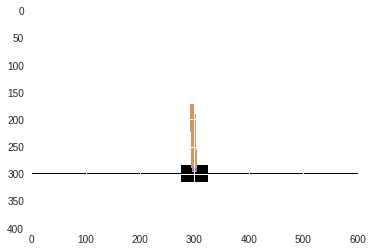

In [0]:
def azione_base(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

totals = []

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imshow(env.render(mode='rgb_array')) # Immagine ambiente

for episode in range(500):
  episode_rewards = 0 #Ad ogni inizio dell' episodio il reward è inizilizzato a 0
                      #questo perchè ad ogni uscita dal ciclo degli step, 
                      #l'asta si è inclinata troppo (done=true) o sono terminati gli step
  obs = env.reset()
  for step in range(1000): # Un massimo di 1000 step
    action = azione_base(obs)
    obs,reward,done,info = env.step(action)
    episode_rewards += reward #contatore dei rewards
    #Immagini del carrello con asta ad ogni step
      #img.set_data(env.render(mode='rgb_array')) # just update the data
      #display.display(plt.gcf())
      #display.clear_output(wait=True)

    if done:
      break
  totals.append(episode_rewards) #contiene il numero di rewards di ogni episode.
  
print(len(totals),totals[:3]) #numero di elementi e i primi 3 elementi della lista

Andiamo ora a vedere la media dei rewards positivi e altre informazioni:

In [0]:
import numpy as np

np.mean(totals), np.std(totals), np.min(totals), np.max(totals)


(42.092, 8.764219075308421, 24.0, 68.0)

Anche con 500 prove, questa policy non riesce a mantenere l'asta in verticale per più di 68 step consecutivi. Non molto bene. Dal render dell'ambiente è possibile vedere che il carro oscilla a destra e a sinistra finchè l'asta non si inclina del tutto.

Vediamo se una rete neurale può elaborare una policy migliore.

## Neural Network Policies

Creiamo una policy con rete neurale. Come la policy programmata sopra, anche questa rete neurale avrà come input un'osservazione e darà come output un' azione da eseguire. Più precisamente si stimerà la probabilità di ogni azione, e quindi selezioneremo un'azione in modo casuale in base alle probabilità stimate. Nell'ambiente del carrello con asta, ci sono solo due possibili azioni (destra o sinistra), c'è bisogno di un solo neurone di output. L'output sarà la probabilità *p* dell'azione 0 (sinistra), e la probabilità dell'azione 1 (destra) sarà *1-p*. Ad esempio, se l'output della rete sarà 0.7, allora si utilizzerà l'azione 0 con il 70% della probabilità, e l'azione 1 con il 30% di probabilità. 

![alt text](https://i.gyazo.com/2e55e2774da74940c4861290438e351b.png)

